In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os#para eliminar csv
plt.style.use('ggplot')

In [2]:
data=pd.read_csv("reservas.csv")#Leemos el fichero csv
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
data.columns#Miramos las columnas del dataframe

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# 1. Haz todo el preprocesamiento para crear un set de entrenamiento y otro de validación qué permita clasificar habitaciones qué tengan sólo las características necesarias. Usaremos como atributos todos los tipos numéricos, en caso de que sean categóricos se recomienda transformarlos Explica qué has hecho y porqué.

Dado que hay dos columnas que hacen referencia al tipo de habitacion, escogemos la habitacion que los clientes has reservado no la que se les ha asignado, dado que se quiere crear un modelo que permita saber que tipo de habitación será mas demandada.

In [4]:
print(data.reserved_room_type)#Columna que se va a utilizar como target

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119390, dtype: object


In [5]:
#Cambiamos variable categoricas por variables numericas de la variable target para realizar el modelo
data["reserved_room_type"]=data['reserved_room_type'].astype('category')
data["reserved_room_type"]=data['reserved_room_type'].cat.codes

In [6]:
#Correlacion de todas las variables respecto a la variable target
#Para detectar las columnas con las caracteristicas necesarias
data.corr()['reserved_room_type'][:]

is_canceled                      -0.061282
lead_time                        -0.106089
arrival_date_year                 0.092809
arrival_date_week_number         -0.007997
arrival_date_day_of_month         0.016929
stays_in_weekend_nights           0.142083
stays_in_week_nights              0.168616
adults                            0.211434
children                          0.378064
babies                            0.038794
is_repeated_guest                -0.029537
previous_cancellations           -0.048809
previous_bookings_not_canceled   -0.021771
reserved_room_type                1.000000
booking_changes                   0.045060
agent                             0.209143
company                           0.033318
days_in_waiting_list             -0.068821
adr                               0.392060
required_car_parking_spaces       0.131583
total_of_special_requests         0.137466
Name: reserved_room_type, dtype: float64

 Escogemos las columnas que mas relacion tengan con la variable en cuestion, es decir, aquellas que la relacion sea mas alta independientemente del signo.

In [7]:
#Eliminamos las columnas que su relacion este proxima a 0, escogeremos las columnas que tengan una correlacion de 
#mas de 0.15
data=data[['children','adr','adults','stays_in_week_nights','agent','reserved_room_type']]
data

,children,adr,adults,stays_in_week_nights,agent,reserved_room_type
0,0.0,0.00,2,0,NaN,2
1,0.0,0.00,2,0,NaN,2
2,0.0,75.00,1,1,NaN,0
3,0.0,75.00,1,1,304.0,0
4,0.0,98.00,2,2,240.0,0
...,...,...,...,...,...,...
119385,0.0,96.14,2,5,394.0,0
119386,0.0,225.43,3,5,9.0,4
119387,0.0,157.71,2,5,9.0,3
119388,0.0,104.40,2,5,89.0,0


In [8]:
data.info( )#miramos los tipos de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   children              119386 non-null  float64
 1   adr                   119390 non-null  float64
 2   adults                119390 non-null  int64  
 3   stays_in_week_nights  119390 non-null  int64  
 4   agent                 103050 non-null  float64
 5   reserved_room_type    119390 non-null  int8   
dtypes: float64(3), int64(2), int8(1)
memory usage: 4.7 MB


In [9]:
data.isnull().sum() #missing values

children                    4
adr                         0
adults                      0
stays_in_week_nights        0
agent                   16340
reserved_room_type          0
dtype: int64

Teniendo en cuenta el bajo porcentaje de missing values eliminaremos dichos valores.

In [10]:
data=data.dropna()#Eliminamos los null
data = data.reset_index(drop=True)#restablecemos el index tras eliminar los null
data

,children,adr,adults,stays_in_week_nights,agent,reserved_room_type
0,0.0,75.00,1,1,304.0,0
1,0.0,98.00,2,2,240.0,0
2,0.0,98.00,2,2,240.0,0
3,0.0,103.00,2,2,303.0,2
4,0.0,82.00,2,3,240.0,0
...,...,...,...,...,...,...
103043,0.0,96.14,2,5,394.0,0
103044,0.0,225.43,3,5,9.0,4
103045,0.0,157.71,2,5,9.0,3
103046,0.0,104.40,2,5,89.0,0


In [11]:
#Quitamos los primeros 10 rows para utilizarlos en el ultimo apartado
test=data.head(10)
data.drop(data.head(10).index,inplace=True)


# UTILIZAR EN EL CASO DE QUE ESTE CREADO EL ARCHIVO CSV
En el caso de no utilizarlo se guardara otro dataframe ademas del que ya se encontraba guardado previamente.
os.remove('habitaciones_clasificar.csv')

In [12]:
#Guardamos los datos en el csv
test.to_csv('habitaciones_clasificar.csv', mode='a', index=False)

# 2. Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué?

He decidido utilizar un clasificador de kneighbours dado que en el enunciado se nos pide hallar el numero de individuos y por ello he entendido que se nos pide utilizar este clasificador.
Para medir la cercanía de esa nueva instancia con el resto se usara el parametro weights='distance' dentro del clasificador.

In [13]:
#Creamos los datos con de entrenamiento y el test
x=data.drop(["reserved_room_type"],axis=1)
y=data["reserved_room_type"]
#80% para el training 20% para la validacion
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Tras definir el test de entrenamiento y el de validacion, ahora pasaremos a configurar como vamos a medir la cercania entre individuos, y cual sera el numero de neighbors que utilizaremos. Para ello haremos uso del algoritmo KNN, y observaremos en el rango de 0-100. 

Compararemos el error con distintas metricas en este caso son euclidea, manhattan , chebyshev y minkowski no se utilizan mas metricas de https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric dado que estas requieren el uso de mas parametros.
Para tener en cuenta la distancia se utilizara el parametro weights distance para que los neighbours cercanos tengan mas influencia que los vecinos mas lejanos

In [14]:
#Funcion en la que se podra ver la comparacion de ambas configuraciones, manhattan y euclidea
#Creamos un bucle que realice 100 iteraciones empezando en 1 y acabando en 100(100 no incluido) 
#para que se pueda ver el error que se obtiene al aumentar el numero de vecinos

def plot_distancia(distancia,color):
    #Creacion de las variables donde se guardan tanto el error como el numero de neighbours
    numero=list(range(1, 101))
    error = []
    error = list()
    for i in range (1,101):
        #Definimos el clasificador
        vecinos=KNeighborsClassifier(n_neighbors=i,weights='distance',metric=distancia)
        #Entrenamos con el clasificador y los datos de entrenamiento
        vecinos.fit(x_train,y_train)
        #Obtenemos el acuraccy medio del test.
        precision=vecinos.score(x_test,y_test)
        #Calculamos el error
        errorpreci=1-precision
        #Guardamos el error en el array
        error.append(errorpreci)
        
    #Busca el numero minimo del array
    zmin = np.min(error)
    #index donde se encuentran los numeros minimos
    posicion=np.where(min(error) == error)
    #pasamos a array para poder sumar
    posicion=np.asarray(posicion)
    #sumamos uno a la posicion dado que el numero del vecino es la posicion +1
    print('El numero de vecino es: '+str(posicion+1))
    print("Minimo error de la metrica: "+str(distancia)+" es " +str(zmin))
    #Grafica
    plt.figure(figsize=(30,9))
    plt.plot(numero, error,color=color)
    plt.title('Numero neighbors vs Error EUCLIDEA')
    plt.xticks(numero)
    plt.xlabel('Numero de vecinos')
    plt.ylabel('Error')  
plt.show()
    
    

El numero de vecino es: [[30]]
Minimo error de la metrica: manhattan es 0.18099767080745344


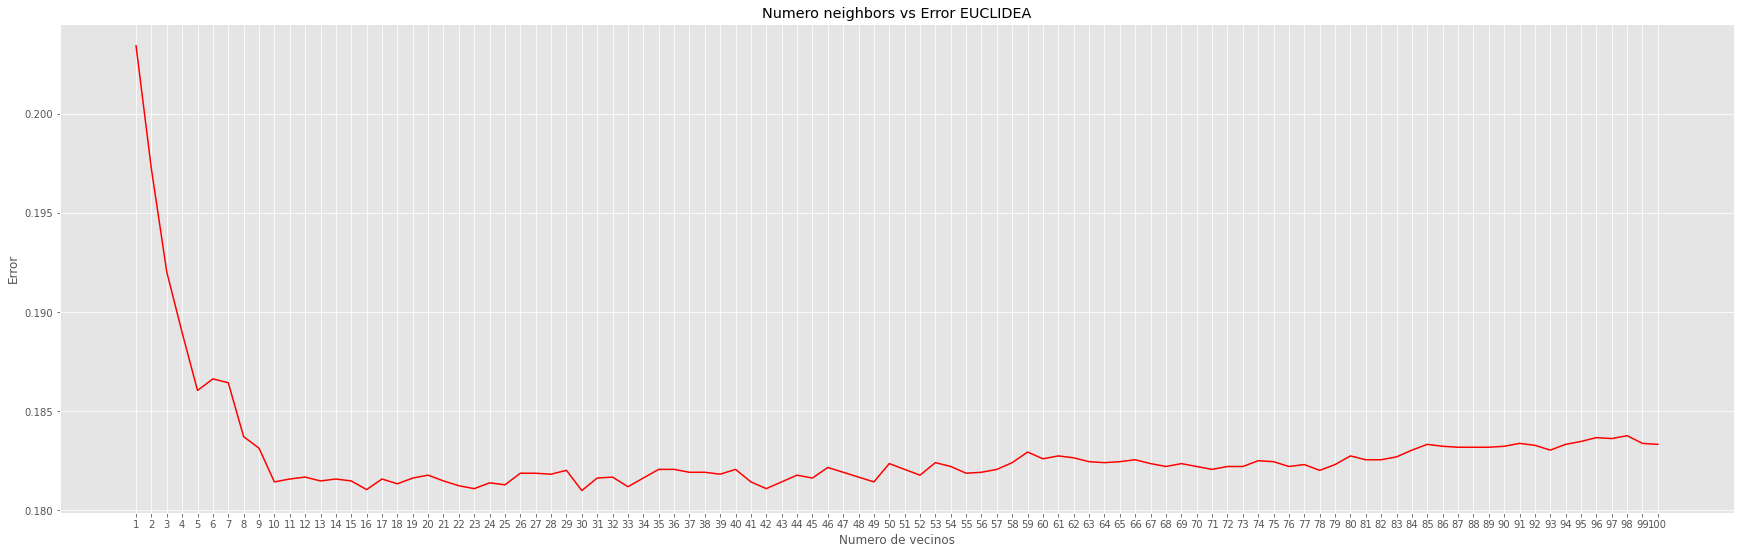

In [15]:
plot_distancia('manhattan','red')

El numero de vecino es: [[13]]
Minimo error de la metrica: euclidean es 0.18405473602484468


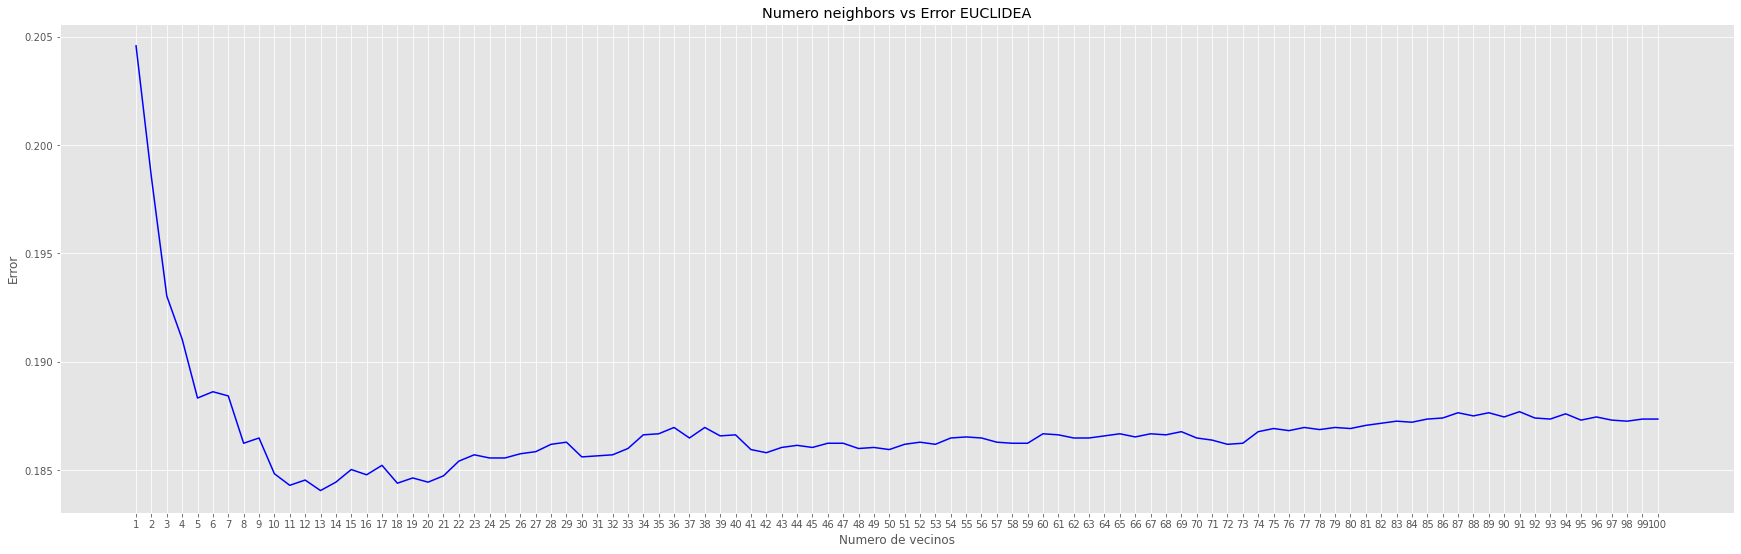

In [16]:
plot_distancia('euclidean','blue')

El numero de vecino es: [[10]]
Minimo error de la metrica: chebyshev es 0.18793672360248448


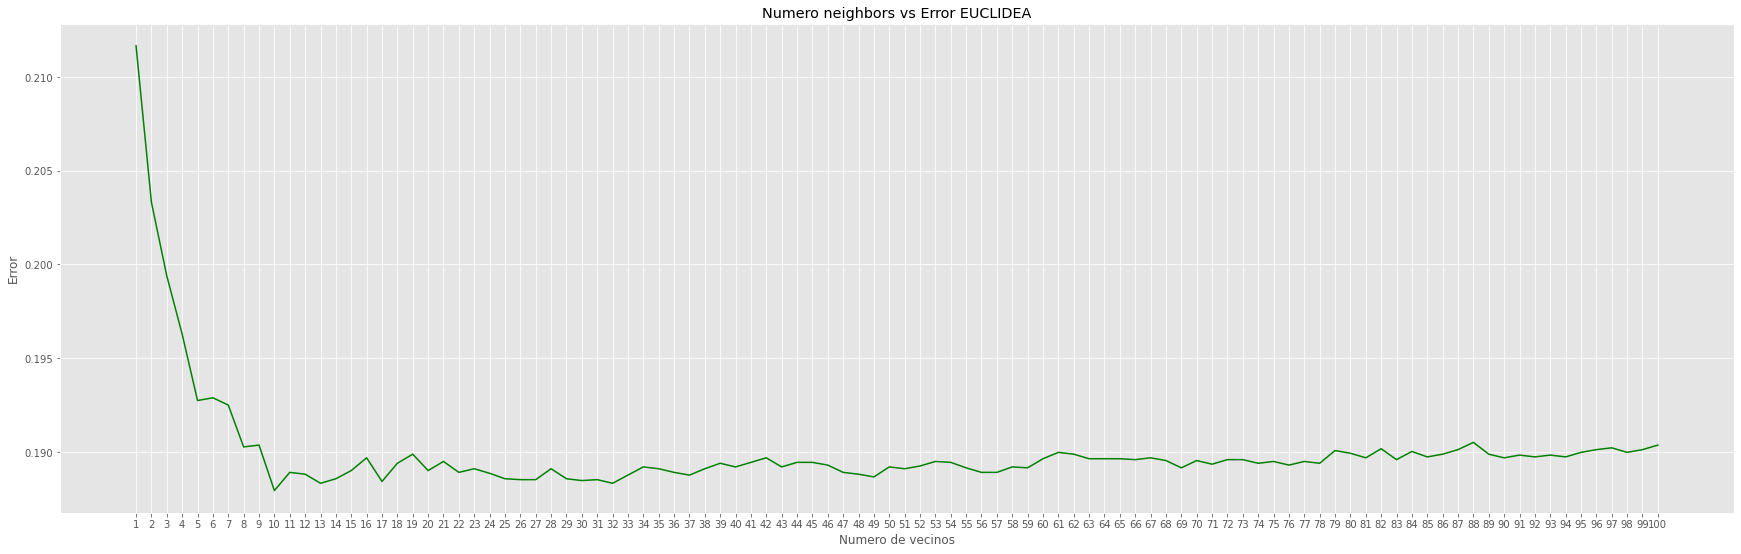

In [17]:
plot_distancia('chebyshev','green')

El numero de vecino es: [[13]]
Minimo error de la metrica: minkowski es 0.18405473602484468


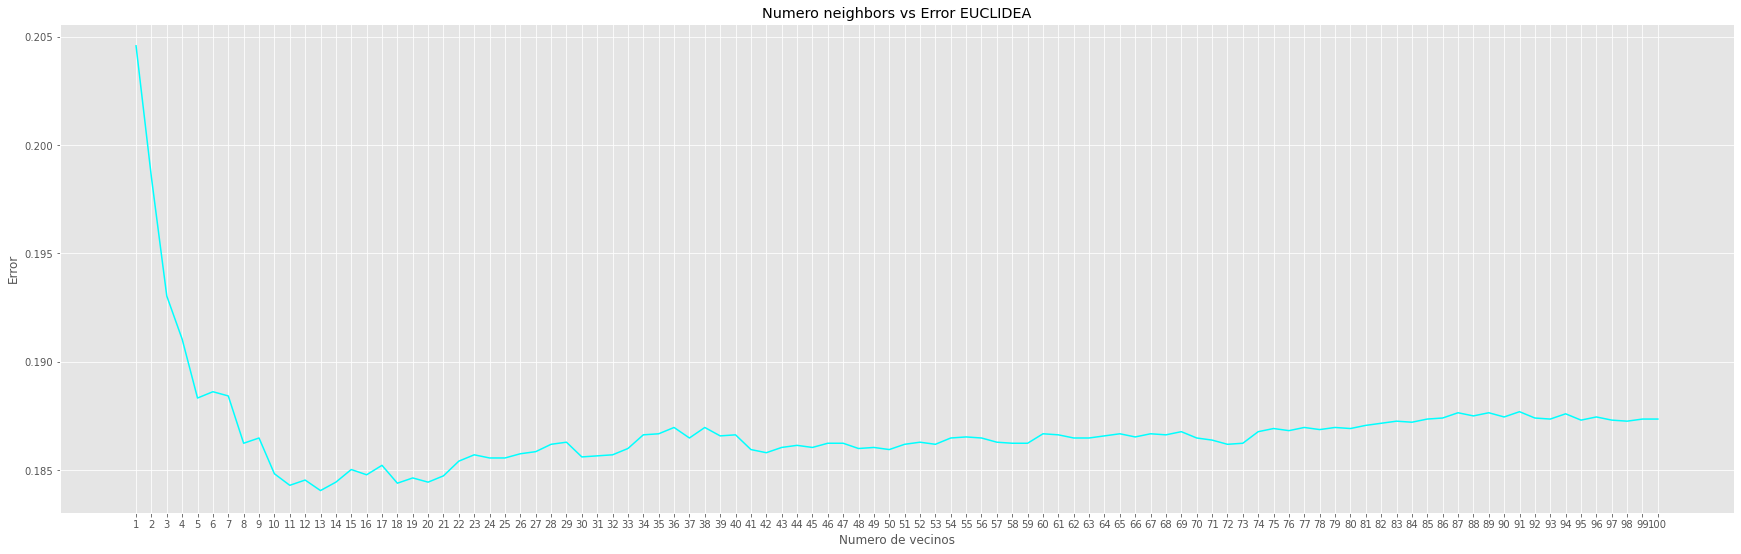

In [18]:
plot_distancia('minkowski','cyan')

Como podemos ver obtenemos menos error al utilizar la distancia de manhattan en concreto con el numero de neighbor 30 frente al error que obtenemos con cualquiera de las otras metricas utilizadas.

In [19]:
#Definimos el clasificador
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',p=1)
#Entrenamos el clasificador
knn.fit(x_train,y_train)
#Matriz de confusion
prediccion=knn.predict(x_test)
print('Matriz de confusion: ')
print(confusion_matrix(y_test,prediccion))
print('')
#Precision
print("Precision:",knn.score(x_test,y_test))

Matriz de confusion: 
[[13939    17     9   581   146    30     7     2]
 [   89    81     0     6     0     9     0     0]
 [   46     0    32    15     8     6    28     1]
 [ 1366     2     5  1932   150    23    13     1]
 [  444     0     2   216   373    28    14     0]
 [   96     4     1    53    25   303    13     1]
 [   70     0    22    41    22    29   191     3]
 [   36     0     4    14    15     0    17    27]]

Precision: 0.8190023291925466


# 3. Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la clasificación. Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las mejores

La mejor configuracion encontrada, es decir, aquella con el menor error es usando la metrica de manhattan con el numero de vecinos 30.
Y la segunda mejor se obtiene con la metrica euclidea o la metrica minkowski con el numero de neighbor 13, por ello escogeremos la metrica euclidea.

## Tabla

In [20]:
#Creacion del dataframe donde se guardaran los datos para mostrarlo como tabla
tabladata = pd.DataFrame(columns=['Vecinos','Error'])

In [21]:
#Representamos hasta mas alla del 30 para mostrar como aumenta tras pasar dicho numero
for i in range (1,35):
    #Definimos el clasificador
    vecinos=KNeighborsClassifier(n_neighbors=i,weights='distance',p=1)
    #Entrenamos con el clasificador y los datos de entrenamiento
    vecinos.fit(x_train,y_train)
    #Obtenemos el acuraccy medio del test.
    precision=vecinos.score(x_test,y_test)
    #Calculamos el error
    errorpreci=1-precision

    tabladata = tabladata.append({'Vecinos': i, 
                                    'Error':errorpreci}, ignore_index=True)
    print('Numero de vecino: '+str(i)+'     Error: '+str(errorpreci))

Numero de vecino: 1     Error: 0.20341614906832295
Numero de vecino: 2     Error: 0.19720496894409933
Numero de vecino: 3     Error: 0.1920128105590062
Numero de vecino: 4     Error: 0.18895574534161486
Numero de vecino: 5     Error: 0.18604425465838514
Numero de vecino: 6     Error: 0.18662655279503104
Numero de vecino: 7     Error: 0.1864324534161491
Numero de vecino: 8     Error: 0.18371506211180122
Numero de vecino: 9     Error: 0.18313276397515532
Numero de vecino: 10     Error: 0.18143439440993792
Numero de vecino: 11     Error: 0.18157996894409933
Numero de vecino: 12     Error: 0.18167701863354035
Numero de vecino: 13     Error: 0.18148291925465843
Numero de vecino: 14     Error: 0.18157996894409933
Numero de vecino: 15     Error: 0.18148291925465843
Numero de vecino: 16     Error: 0.18104619565217395
Numero de vecino: 17     Error: 0.18157996894409933
Numero de vecino: 18     Error: 0.1813373447204969
Numero de vecino: 19     Error: 0.18162849378881984
Numero de vecino: 20    

In [22]:
#Tabla en dataframe
tabladata

,Vecinos,Error
0,1.0,0.203416
1,2.0,0.197205
2,3.0,0.192013
3,4.0,0.188956
4,5.0,0.186044
5,6.0,0.186627
6,7.0,0.186432
7,8.0,0.183715
8,9.0,0.183133
9,10.0,0.181434


Aqui podemos ver como al aumentar el numero de vecinos hasta llegar al numero 30 el error va descendiendo, sin embargo, cuando lo sobrepasa va aumentando ligeramente tal y como se puede ver en la grafica que hace referencia a la distancia de manhattan.

## Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las mejores.

CONFIGURACION ESCOGIDA COMO LA MEJOR DE TODAS

In [35]:
vecinos=KNeighborsClassifier(n_neighbors=30,weights='distance',p=1)
vecinos.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30, p=1, weights='distance')

In [36]:
#Resultados predichos por el clasificador
vecinos.predict(x_test)

[0 0 0 ... 3 0 0]


In [25]:
#Resultados reales
y_test

90136    0
24578    0
55193    0
37027    0
69299    5
        ..
67116    0
53803    0
76416    3
45292    0
97609    0
Name: reserved_room_type, Length: 20608, dtype: int8

In [26]:
#Precision del modelo
vecinos.score(x_test,y_test)

0.8190023291925466

CONFIGURACION ESCOGIDA COMO MEJOR CON LA DISTANCIA EUCLIDEA (LA SEGUNDA MEJOR EN TOTAL)

In [27]:
vecinoseuclidea=KNeighborsClassifier(n_neighbors=13,weights='distance',p=2,metric='minkowski')
vecinoseuclidea.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [28]:
#Resultados predichos por el clasificador de la distancia euclidea
vecinoseuclidea.predict(x_test)

array([0, 0, 0, ..., 3, 0, 0], dtype=int8)

In [29]:
#Resultados reales
y_test

90136    0
24578    0
55193    0
37027    0
69299    5
        ..
67116    0
53803    0
76416    3
45292    0
97609    0
Name: reserved_room_type, Length: 20608, dtype: int8

# 4. Utiliza el clasificador para saber que ocurre con los asteroides de un dataset que se llame “habitaciones_clasificar.csv” que obtendremos del dataset proporcionado.

In [30]:
#Cargamos el archivo
test = pd.read_csv('habitaciones_clasificar.csv')
test

,children,adr,adults,stays_in_week_nights,agent,reserved_room_type
0,0.0,75.0,1,1,304.0,0
1,0.0,98.0,2,2,240.0,0
2,0.0,98.0,2,2,240.0,0
3,0.0,103.0,2,2,303.0,2
4,0.0,82.0,2,3,240.0,0
...,...,...,...,...,...,...
71,0.0,105.5,2,3,15.0,3
72,0.0,123.0,2,4,240.0,4
73,0.0,145.0,2,4,240.0,3
74,0.0,97.0,2,4,240.0,3


In [31]:
#Creamos los datos con de entrenamiento y el test
x=data.drop(["reserved_room_type"],axis=1)
y=data["reserved_room_type"]
#80% para el training 20% para la validacion
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
#Resultados predichos
vecinos.predict(x_test)

array([0, 0, 0, ..., 3, 0, 0], dtype=int8)

In [33]:
#Resultados reales
y_test

90136    0
24578    0
55193    0
37027    0
69299    5
        ..
67116    0
53803    0
76416    3
45292    0
97609    0
Name: reserved_room_type, Length: 20608, dtype: int8

In [34]:
#Precision
vecinos.score(x_test,y_test)

0.8190023291925466

# Referencias
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric